In [2]:
import mediapipe as mp

import cv2

import matplotlib.pyplot as plt

import pyautogui

import time

import numpy as np

import math

import movement_controller 

import mouse_controller

import action_controller

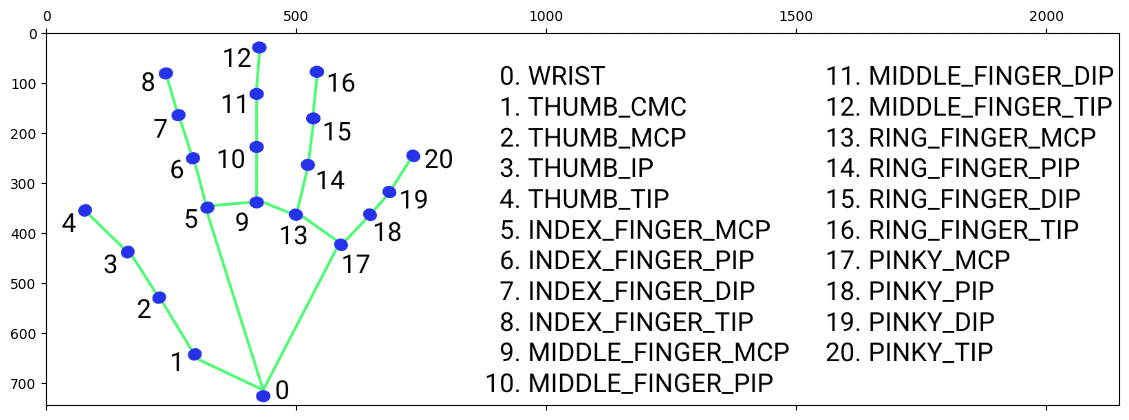

In [3]:
img = cv2.imread("hand-landmarks.png")

plt.matshow(img)

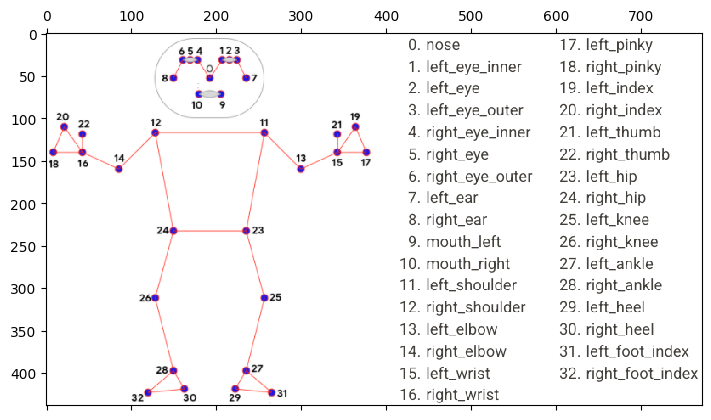

In [4]:
img = cv2.imread("mediapipe_pose_landmarks_index.png")

plt.matshow(img)

In [9]:
class game_control :

    def __init__(self):

        mp_hands = mp.solutions.hands

        mp_pose = mp.solutions.pose
        
        self.hand_detector = mp_hands.Hands(model_complexity = 1 , min_tracking_confidence  = 0.5 , min_detection_confidence = 0.5)
        
        self.pose_detector = mp_pose.Pose(model_complexity = 1 , min_tracking_confidence  = 0.5 , min_detection_confidence = 0.5)

        self.control_movement = movement_controller.control_movement()

        self.control_mouse = mouse_controller.control_mouse()

        self.control_action = action_controller.control_action()


    def process(self,img,height,width) :

        display_text = None

        inp = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

        results_hands = self.hand_detector.process(inp)
    
        results_pose = self.pose_detector.process(inp)

        pose_landmarks = results_pose.pose_landmarks.landmark
    
        px , py = pose_landmarks[0].x , pose_landmarks[0].y        

        cv2.rectangle(img , (5,5) , (150,45) , (0,0,255),4)


        status , text =  self.control_movement.process(pose_landmarks) 
        
        if(status != None):
            display_text = text
            
        else:
            
            img, right_hand_index, display_text = self.control_mouse.process( results_hands.multi_hand_landmarks, img, px, height, width , 100)

            if(right_hand_index != None):

                display_text = self.control_action.process(results_hands.multi_hand_landmarks[right_hand_index].landmark)

        if(display_text == None):
            display_text = "None"

    

        cv2.putText(img , display_text , (10,35) , cv2.FONT_HERSHEY_SIMPLEX , 1 , (255,0,0) , 3)
        return img


        
                         
                

In [15]:
if __name__ == "__main__":
    cap = cv2.VideoCapture(0)
    
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    
    control = game_control()
    
    while True:
    
        ret , frame = cap.read()
        try:
            frame = control.process(frame,height,width)
            
        except:
            pass
        
        
        cv2.imshow("windows" ,frame)
    
        
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            cap.release()
            break
    
    cv2.destroyAllWindows()

s
w
s
d
a
w
